# 数据挖掘作业一
## 姓名：林金坤 学号：3220211034
## 数据集：Oakland Crime Statistics 2011 to 2016

In [3]:
#导入必要的包
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from collections import Counter
from math import isnan
import math


## 查看数据集并对数据集进行了解

In [4]:
#查看当前文件夹下有哪些数据集以及数据集所处的路径
import os
for dirname, _, filenames in os.walk('E:\homework-1\data\oakland-crime-statistics-2011-to-2016'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#数据集文件解释，这里我们拿records-for-2011.csv做数据分析        
#其他文件均为2011-2016的犯罪数据

E:\homework-1\data\oakland-crime-statistics-2011-to-2016\records-for-2011.csv
E:\homework-1\data\oakland-crime-statistics-2011-to-2016\records-for-2012.csv
E:\homework-1\data\oakland-crime-statistics-2011-to-2016\records-for-2013.csv
E:\homework-1\data\oakland-crime-statistics-2011-to-2016\records-for-2014.csv
E:\homework-1\data\oakland-crime-statistics-2011-to-2016\records-for-2015.csv
E:\homework-1\data\oakland-crime-statistics-2011-to-2016\records-for-2016.csv


In [5]:
#读取数据集
path = 'E:\homework-1\data\oakland-crime-statistics-2011-to-2016/'
data = pd.read_csv(path+'records-for-2011.csv',index_col=0)
data.head()#默认展示前五行数据


,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
Agency,,,,,,,,,
OP,2011-01-01T00:00:00.000,ST&SAN PABLO AV,1.0,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000
OP,2011-01-01T00:01:11.000,ST&HANNAH ST,1.0,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000
OP,2011-01-01T00:01:25.000,ST&MARKET ST,1.0,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000
OP,2011-01-01T00:01:35.000,PRENTISS ST,2.0,21Y,2.0,415GS,415 GUNSHOTS,LOP110101000005,2011-01-01T00:02:28.000
OP,2011-01-01T00:02:10.000,AV&FOOTHILL BLVD,2.0,20X,1.0,415GS,415 GUNSHOTS,LOP110101000004,2011-01-01T00:50:04.000


In [6]:
data.dtypes #每列数据的数据类型

Create Time                   object
Location                      object
Area Id                      float64
Beat                          object
Priority                     float64
Incident Type Id              object
Incident Type Description     object
Event Number                  object
Closed Time                   object
dtype: object

In [7]:
data.shape #数据集的大小

(180016, 9)

# 数据分析要求

##  数据可视化和摘要



###  数据摘要
（1）标称属性，给出每个可能聚会的频数

In [8]:
#由上面对数据集各列进行分析得知，该数据集的标称属性有'Create Time','Location','Beat','Incident Type Id',
#'Incident Type Description','Event Number','Closed Time'七个标称属性
#下面给出每个属性取值的频数
#(1)Create Time
pd.value_counts(data['Create Time'])

2011-06-02T00:00:00.000    4
2011-03-27T00:22:41.000    3
2011-09-21T14:05:59.000    3
2011-03-13T23:16:51.000    2
2011-03-21T11:07:15.000    2
                          ..
2011-05-05T14:20:08.000    1
2011-05-05T14:20:57.000    1
2011-05-05T14:21:31.000    1
2011-05-05T14:22:28.000    1
2011-12-31T23:58:08.000    1
Name: Create Time, Length: 179451, dtype: int64

In [9]:
#(2) Location
pd.value_counts(data['Location'])

 INTERNATIONAL BLVD        3866
 MACARTHUR BLVD            3129
 AV&INTERNATIONAL BLVD     3067
 BROADWAY                  2132
 FOOTHILL BLVD             1791
                           ... 
54TH PANORAMIC WY             1
54TH 10TH AV                  1
54TH 46TH ST                  1
540A AV&FOOTHILL BLVD         1
WOODSON B ST                  1
Name: Location, Length: 32505, dtype: int64

In [10]:
#(3) Beat
pd.value_counts(data['Beat'])

04X     7410
08X     6885
26Y     5478
30Y     5295
06X     5119
23X     5051
30X     4956
19X     4955
34X     4673
29X     4483
20X     4287
27Y     4159
07X     4134
31Y     4082
25X     4022
35X     3880
33X     3849
03X     3819
32X     3711
27X     3703
09X     3630
21Y     3435
32Y     3125
22X     3061
26X     2978
02Y     2970
10X     2967
14X     2733
03Y     2726
22Y     2664
12Y     2651
05X     2633
02X     2614
31X     2603
21X     2593
17Y     2582
24Y     2575
13Z     2546
15X     2509
24X     2459
12X     2422
10Y     2383
01X     2210
28X     2191
17X     2133
11X     2087
13Y     2017
35Y     1956
31Z     1870
18Y     1778
16Y     1561
14Y     1492
25Y     1482
13X     1122
18X     1063
16X      994
05Y      710
PDT2      20
Name: Beat, dtype: int64

In [11]:
#(4)Incident Type Id
pd.value_counts(data['Incident Type Id'])

933R      17348
911H      12817
SECCK     11393
415       10752
10851      7180
          ...  
970A          1
148           1
963           1
346           1
YELALT        1
Name: Incident Type Id, Length: 263, dtype: int64

In [12]:
#(5)Incident Type Description
pd.value_counts(data['Incident Type Description'])

ALARM-RINGER            17348
911 HANG-UP             12817
SECURITY CHECK          11393
STOLEN VEHICLE           7180
415 UNKNOWN              6624
                        ...  
INJURE TELEPHONE/POW        1
CONSPIRACY COURT ORD        1
POSSESSION/MANUFACTU        1
PLAYING BALL IN STRE        1
YELLOW ALERT AT THE         1
Name: Incident Type Description, Length: 265, dtype: int64

In [13]:
#(6)Event Number
pd.value_counts(data['Event Number'])

LOP110101000001    1
LOP110830000198    1
LOP110830000186    1
LOP110830000187    1
LOP110830000189    1
                  ..
LOP110505000405    1
LOP110505000404    1
LOP110505000408    1
LOP110505000409    1
LOP111231001017    1
Name: Event Number, Length: 180015, dtype: int64

In [14]:
#(7)Closed Time
pd.value_counts(data['Closed Time'])

2011-05-31T01:35:18.000    2
2011-11-28T15:55:49.000    2
2011-05-27T18:57:03.000    2
2011-11-20T12:39:22.000    2
2011-09-17T02:40:43.000    2
                          ..
2011-05-05T14:38:16.000    1
2011-05-05T17:39:54.000    1
2011-05-05T14:58:20.000    1
2011-05-05T15:51:33.000    1
2012-01-01T02:59:48.000    1
Name: Closed Time, Length: 179506, dtype: int64

(2)数值属性，给出5数概括及缺失值的个数

In [15]:
#这里的数值属性包括points和price
#用describe函数对数据的5数进行概括
digital_data = ['Area Id','Priority']
data[digital_data].describe()

,Area Id,Priority
count,179112.000000,180015.000000
mean,1.740648,1.796111
std,0.746468,0.402916
min,1.000000,0.000000
25%,1.000000,2.000000
50%,2.000000,2.000000
75%,2.000000,2.000000
max,3.000000,2.000000


Area Id:最大值3，最小值1，均值1.74，中位数2，四分位数[1,2,2],缺失值个数为904

Priority:最大值2，最小值0，均值1.80，中位数2，四分位数[2,2,2],缺失值个数为1

In [16]:

#给出points和price缺失值个数
print("The Null num of 'Area Id' is:",data['Area Id'].isnull().sum())

The Null num of 'Area Id' is: 904


In [17]:
print("The Null num of 'Priority' is:",data['Priority'].isnull().sum())

The Null num of 'Priority' is: 1


### 数据可视化
（1）绘制Area Id的直方图、盒图、qq图（此处只针对数值类型的数据）

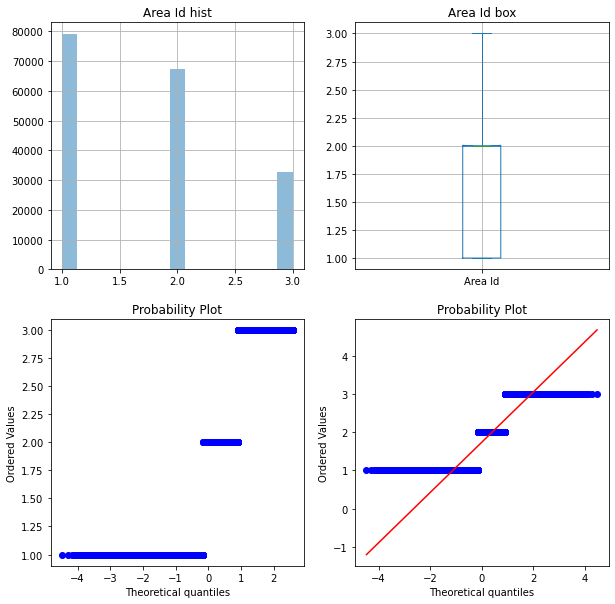

In [18]:
# coding=utf-8
plt.figure(figsize = (10,10))

#直方图
plt.subplot(2,2,1)
plt.title("Area Id hist")
data['Area Id'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#盒图
plt.subplot(2,2,2)
plt.title("Area Id box")
data['Area Id'].plot(kind='box',notch=True,grid=True)

#q-q图
plt.subplot(2,2,3)
stats.probplot(data['Area Id'],dist="norm",plot=plt)

#去除缺失值再绘制q-q图
plt.subplot(2,2,4)
data_drop=pd.DataFrame(data['Area Id'].copy(deep=True))
data_drop = data_drop.dropna()
stats.probplot(data_drop['Area Id'], dist="norm", plot=plt)

plt.show()


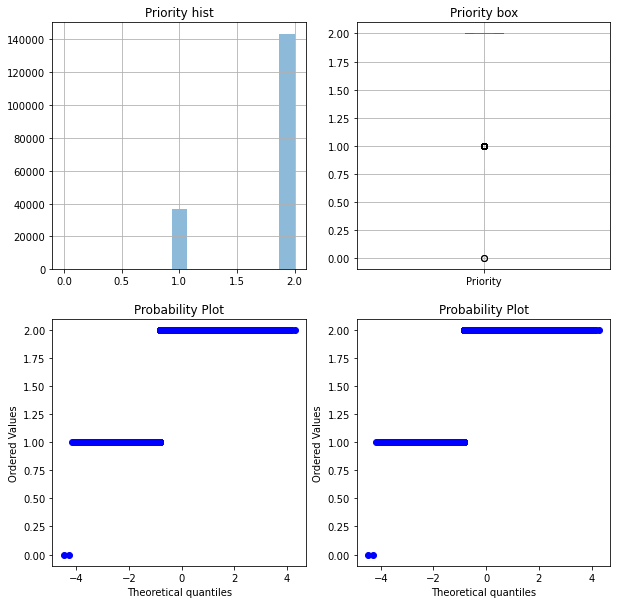

In [19]:
#绘制price的直方图、盒图、qq图
plt.figure(figsize = (10,10))

#直方图
plt.subplot(2,2,1)
plt.title("Priority hist")
data['Priority'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#盒图
plt.subplot(2,2,2)
plt.title("Priority box")
data['Priority'].plot(kind='box',notch=True,grid=True)

#q-q图
plt.subplot(2,2,3)
stats.probplot(data['Priority'],dist="norm",plot=plt)

#去除缺失值再绘制q-q图
plt.subplot(2,2,4)
pricewithooutnulldata = pd.DataFrame(data['Priority']) 
pricewithooutnulldata = pricewithooutnulldata.dropna()  
stats.probplot(data['Priority'],dist="norm",plot=plt)

plt.show()

### 由上图可以得出结论：

Area Id属性、Priority属性分布均不符合正态分布。


# 数据缺失处理

In [20]:
#绘制表格查看数据缺失值并检验四种方案填充后是否还有缺失值
def missing_data(datatodel):
    missing_num = datatodel.isnull().sum()
    missing_percent = missing_num/datatodel.shape[0]*100
    concat_data = pd.concat([missing_num,missing_percent],axis=1,keys=['missing_num','missing_percent'])
    concat_data['Types'] = datatodel.dtypes
    return concat_data


由上表可以看出，数值型数据price存在缺失值

标称型数据country，designation,province,region_1,region_2存在缺失值

这里缺失的原因可能是由于未完全记录、遗漏或无法获取

## 方案一 缺失值剔除

In [21]:
#未处理前的原始数据
missing_data(data)

,missing_num,missing_percent,Types
Create Time,1,0.000556,object
Location,0,0.000000,object
Area Id,904,0.502178,float64
Beat,520,0.288863,object
Priority,1,0.000556,float64
Incident Type Id,1,0.000556,object
Incident Type Description,1,0.000556,object
Event Number,1,0.000556,object
Closed Time,7,0.003889,object


In [22]:
del_null_data = data.copy(deep=True)
del_null_data = del_null_data.dropna()

In [23]:
#处理缺失数据后的数据展示
missing_data(del_null_data)

,missing_num,missing_percent,Types
Create Time,0,0.0,object
Location,0,0.0,object
Area Id,0,0.0,float64
Beat,0,0.0,object
Priority,0,0.0,float64
Incident Type Id,0,0.0,object
Incident Type Description,0,0.0,object
Event Number,0,0.0,object
Closed Time,0,0.0,object


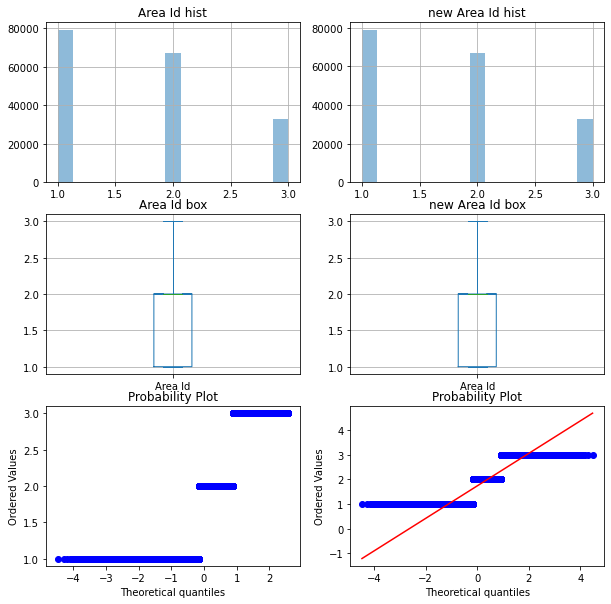

In [24]:
# Area Id 可视化对比新旧数据

plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("Area Id hist")
data['Area Id'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#直方图
plt.subplot(3,2,2)
plt.title("new Area Id hist")
del_null_data['Area Id'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数


#盒图
plt.subplot(3,2,3)
plt.title("Area Id box")
data['Area Id'].plot(kind='box',notch=True,grid=True)

#盒图
plt.subplot(3,2,4)
plt.title("new Area Id box")
del_null_data['Area Id'].plot(kind='box',notch=True,grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['Area Id'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(del_null_data['Area Id'],dist="norm",plot=plt)

plt.show()

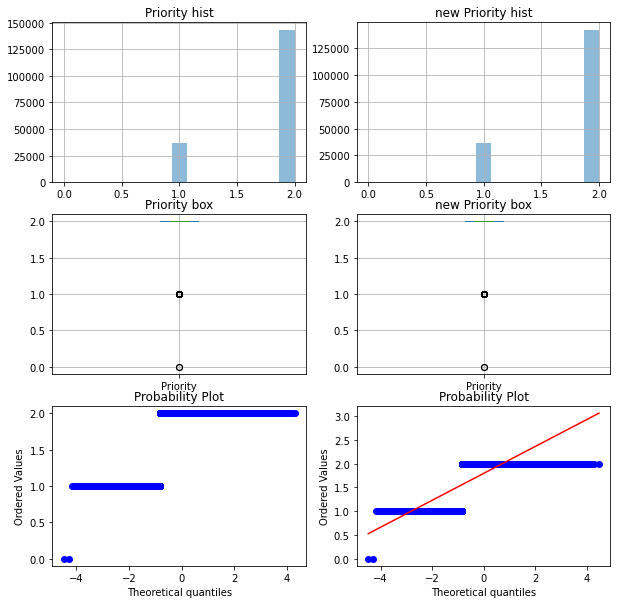

In [25]:
# Priority 可视化对比新旧数据

plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("Priority hist")
data['Priority'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#直方图
plt.subplot(3,2,2)
plt.title("new Priority hist")
del_null_data['Priority'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数


#盒图
plt.subplot(3,2,3)
plt.title("Priority box")
data['Priority'].plot(kind='box',notch=True,grid=True)

#盒图
plt.subplot(3,2,4)
plt.title("new Priority box")
del_null_data['Priority'].plot(kind='box',notch=True,grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['Priority'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(del_null_data['Priority'],dist="norm",plot=plt)

plt.show()

In [26]:
del_null_data[['Area Id','Priority']].describe()  #缺失部分剔除后数据的5数概况

,Area Id,Priority
count,178771.000000,178771.000000
mean,1.740898,1.795252
std,0.746487,0.403546
min,1.000000,0.000000
25%,1.000000,2.000000
50%,2.000000,2.000000
75%,2.000000,2.000000
max,3.000000,2.000000


缺失部分剔除后

Area Id:最大值3，最小值1，均值1.74，中位数2，四分位数[1,2,2],缺失值个数为0

Priority:最大值2，最小值0，均值1.80，中位数2，四分位数[2,2,2],缺失值个数为0

## 用最高频率值来填补缺失值

In [27]:
#用最高频率来填补缺失值--此处使用深拷贝，否则会改变原值
fill_data_with_most_frequency = data.copy(deep=True)
#对'Area Id'进行最高频率值填补缺失值
word_counts = Counter(fill_data_with_most_frequency['Area Id'])
top = word_counts.most_common(1)[0][0]
fill_data_with_most_frequency['Area Id'] = fill_data_with_most_frequency['Area Id'].fillna(top)


#对'Area Id'进行最高频率值填补缺失值
word_counts = Counter(fill_data_with_most_frequency['Priority'])
top = word_counts.most_common(1)[0][0]
fill_data_with_most_frequency['Priority'] = fill_data_with_most_frequency['Priority'].fillna(top)

In [28]:
#查看填充后是否还有数据缺失
missing_data(fill_data_with_most_frequency)

,missing_num,missing_percent,Types
Create Time,1,0.000556,object
Location,0,0.000000,object
Area Id,0,0.000000,float64
Beat,520,0.288863,object
Priority,0,0.000000,float64
Incident Type Id,1,0.000556,object
Incident Type Description,1,0.000556,object
Event Number,1,0.000556,object
Closed Time,7,0.003889,object


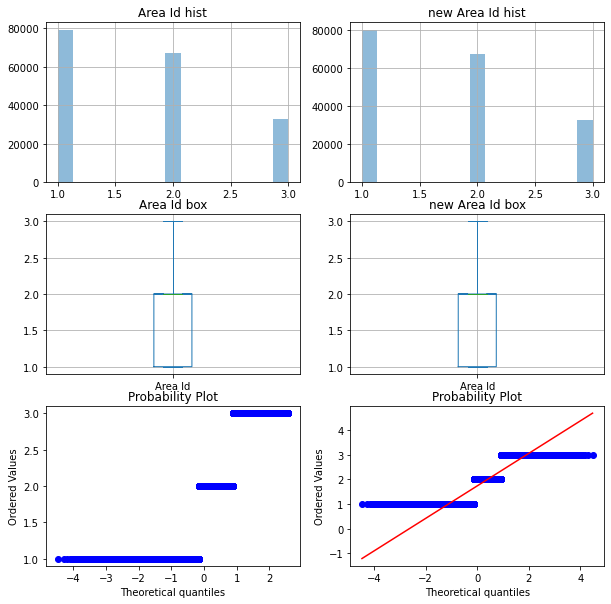

In [29]:
#Area Id 可视化对比新旧数据

plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("Area Id hist")
data['Area Id'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#直方图
plt.subplot(3,2,2)
plt.title("new Area Id hist")
fill_data_with_most_frequency['Area Id'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数


#盒图
plt.subplot(3,2,3)
plt.title("Area Id box")
data['Area Id'].plot(kind='box',notch=True,grid=True)

#盒图
plt.subplot(3,2,4)
plt.title("new Area Id box")
fill_data_with_most_frequency['Area Id'].plot(kind='box',notch=True,grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['Area Id'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(fill_data_with_most_frequency['Area Id'],dist="norm",plot=plt)

plt.show()

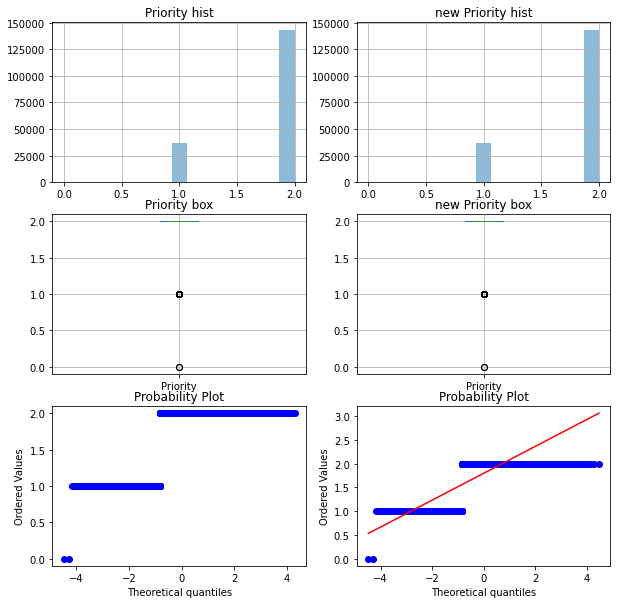

In [30]:
#Priority 可视化对比新旧数据

plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("Priority hist")
data['Priority'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#直方图
plt.subplot(3,2,2)
plt.title("new Priority hist")
fill_data_with_most_frequency['Priority'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数


#盒图
plt.subplot(3,2,3)
plt.title("Priority box")
data['Priority'].plot(kind='box',notch=True,grid=True)

#盒图
plt.subplot(3,2,4)
plt.title("new Priority box")
fill_data_with_most_frequency['Priority'].plot(kind='box',notch=True,grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['Priority'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(fill_data_with_most_frequency['Priority'],dist="norm",plot=plt)

plt.show()

In [31]:
#对填充后的新数据进行描述
fill_data_with_most_frequency[['Area Id','Priority']].describe()

,Area Id,Priority
count,180016.000000,180016.000000
mean,1.736929,1.796113
std,0.746430,0.402915
min,1.000000,0.000000
25%,1.000000,2.000000
50%,2.000000,2.000000
75%,2.000000,2.000000
max,3.000000,2.000000


## 通过属性的相关关系来填补缺失值

In [32]:
#查看相关的属性关系
data.corr()

,Area Id,Priority
Area Id,1.000000,-0.023366
Priority,-0.023366,1.000000


In [33]:
#通过属性的相关关系来填补缺失值
target_data = data['Area Id'].copy(deep=True)
source_data = data['Priority'].copy(deep=True)

flag1 = target_data.isnull().values
flag2 = source_data.isnull().values

i=0
for _,value in target_data.iteritems():
    if(flag1[i]==True) and (flag2[i]==False):
        target_data[i] = 3 - source_data[i]
    i=i+1


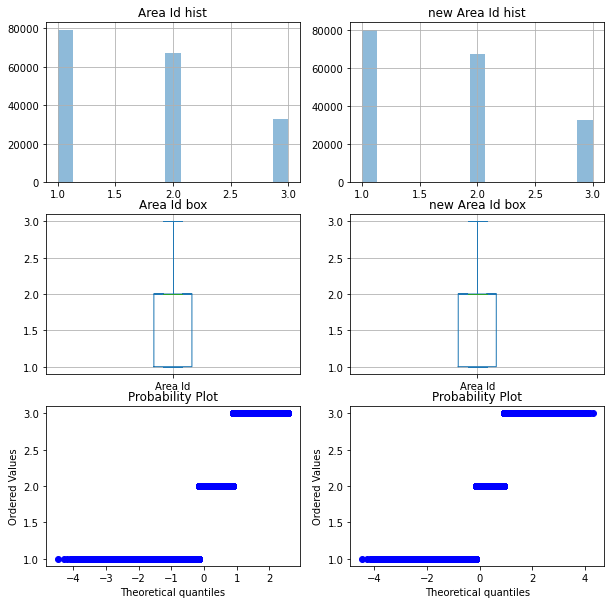

In [34]:
#Area Id 可视化对比新旧数据

plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("Area Id hist")
data['Area Id'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#直方图
plt.subplot(3,2,2)
plt.title("new Area Id hist")
target_data.hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数


#盒图
plt.subplot(3,2,3)
plt.title("Area Id box")
data['Area Id'].plot(kind='box',notch=True,grid=True)

#盒图
plt.subplot(3,2,4)
plt.title("new Area Id box")
target_data.plot(kind='box',notch=True,grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['Area Id'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(target_data,dist="norm",plot=plt)

plt.show()

In [35]:
#补充后的Area Id数据描述
target_data.describe()

count    180015.000000
mean          1.737089
std           0.746381
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: Area Id, dtype: float64

In [36]:
#通过属性的相关关系来填补Priority缺失值
target_data = data['Priority'].copy(deep=True)
source_data = data['Area Id'].copy(deep=True)

flag1 = target_data.isnull().values
flag2 = source_data.isnull().values

i=0
for _,value in target_data.iteritems():
    if(flag1[i]==True) and (flag2[i]==False):
        target_data[i] = 3 - source_data[i]
    i=i+1

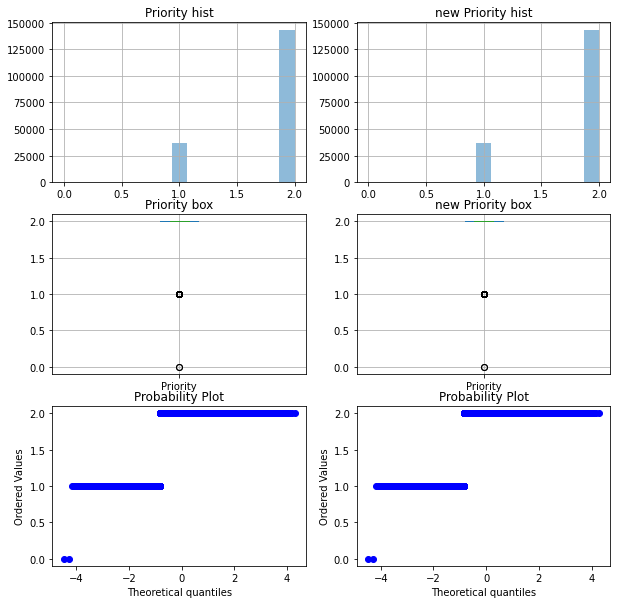

In [37]:
#Priority可视化对比新旧数据

plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("Priority hist")
data['Priority'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#直方图
plt.subplot(3,2,2)
plt.title("new Priority hist")
target_data.hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数


#盒图
plt.subplot(3,2,3)
plt.title("Priority box")
data['Priority'].plot(kind='box',notch=True,grid=True)

#盒图
plt.subplot(3,2,4)
plt.title("new Priority box")
target_data.plot(kind='box',notch=True,grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['Priority'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(target_data,dist="norm",plot=plt)

plt.show()

In [38]:
#补充后的Priority数据描述
target_data.describe()

count    180015.000000
mean          1.796111
std           0.402916
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: Priority, dtype: float64

## 通过对象的相似性填补缺失值

In [39]:
numeric_attr = ['Area Id','Priority']
#查找两个对象间的相似性
#如果通过暴力法求解耗时耗力
#所以选择通过二分法查找的方法进行相似性选择

def find_dis_value(dataset, pos, numeric_attr):
    def dis_objs(tar_obj_index, sou_obj_index):
        tar_obj = dataset.iloc[tar_obj_index]
        sou_obj = dataset.iloc[sou_obj_index]
        dis_value = 0
        for column in tar_obj.index:
            if column == 'Priority':
                if (not math.isnan(tar_obj[column])) and (not math.isnan(sou_obj[column])):                 
                    dis_value += sou_obj[column] - tar_obj[column]                
                else:
                    dis_value += 9998
        return dis_value

    
    mindis = 9999
    result_pos = -1
    leftindex = 0;
    rightindex = dataset.shape[0]-1
    #二分查找返回最近距离的一个result_pos
    while leftindex<=rightindex:
        midindex = int((leftindex+rightindex)/2)
        tmpdis = dis_objs(pos,midindex)        
        if(tmpdis>0):
            rightindex = midindex-1            
        elif(tmpdis == 0):
            result_pos = midindex
            break;
        else:
            leftindex = midindex+1        
        if(tmpdis<mindis):
            result_pos = midindex  
    return result_pos




# 通过数据对象之间的相似性来填补缺失值
numical_datasets = pd.DataFrame(data[numeric_attr].copy(deep=True))

#对numical_datasets排序
numical_datasets.sort_values("Priority",inplace=True)
data_area_id = numical_datasets['Area Id'].copy(deep=True)

print('空数据数量为:',data_area_id.isnull().sum())
length = numical_datasets.shape[0]
count=1;
for i in range(length):
    if math.isnan(numical_datasets['Area Id'].iloc[i]):       
#         print('当前处理第'+str(count)+"个")
#         print(i,numical_datasets.iloc[i])  
        result_pos = find_dis_value(numical_datasets, i, numeric_attr)
#         print(result_pos,numical_datasets.iloc[result_pos])
        data_area_id.iloc[i] = data_area_id.iloc[result_pos]
#         print(i,data_area_id.iloc[i])
        count+=1

空数据数量为: 904


In [40]:
#填充后的空数据数量
print(data_area_id.isnull().sum())

0


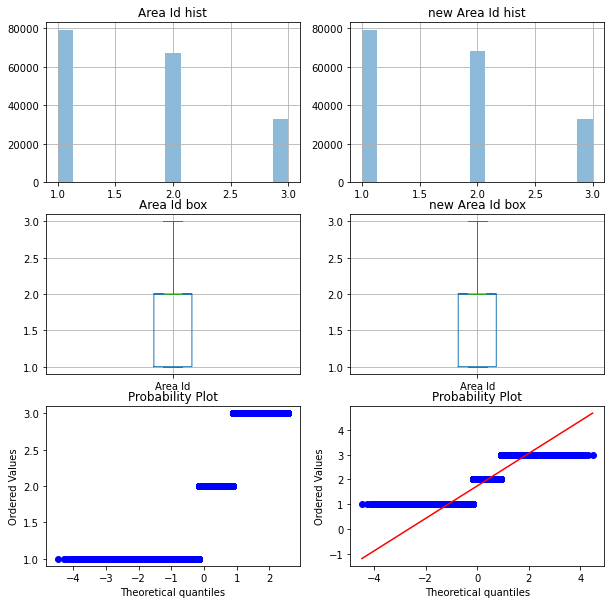

In [41]:
#Area Id可视化对比新旧数据

plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("Area Id hist")
data['Area Id'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#直方图
plt.subplot(3,2,2)
plt.title("new Area Id hist")
data_area_id.hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数


#盒图
plt.subplot(3,2,3)
plt.title("Area Id box")
data['Area Id'].plot(kind='box',notch=True,grid=True)

#盒图
plt.subplot(3,2,4)
plt.title("new Area Id box")
data_area_id.plot(kind='box',notch=True,grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['Area Id'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(data_area_id,dist="norm",plot=plt)

plt.show()

In [42]:
#area id的数据描述
data_area_id.describe()  # #通过数据对象之间的相似性来填补后数据的5数概况

count    180016.000000
mean          1.741956
std           0.744823
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: Area Id, dtype: float64

通过相似性填补后

Area Id:最大值3，最小值1，均值1.74，中位数2，四分位数[1,2,2],缺失值个数为0

In [43]:
#使用id 对 priority进行填补
numeric_attr = ['Area Id','Priority']
#查找两个对象间的相似性
#如果通过暴力法求解耗时耗力
#所以选择通过二分法查找的方法进行相似性选择

def find_dis_value(dataset, pos, numeric_attr):
    def dis_objs(tar_obj_index, sou_obj_index):
        tar_obj = dataset.iloc[tar_obj_index]
        sou_obj = dataset.iloc[sou_obj_index]
        dis_value = 0
        for column in tar_obj.index:
            if column == 'Area Id':
                if (not math.isnan(tar_obj[column])) and (not math.isnan(sou_obj[column])):                 
                    dis_value += sou_obj[column] - tar_obj[column]                
                else:
                    dis_value += 9998
        return dis_value

    
    mindis = 9999
    result_pos = -1
    leftindex = 0;
    rightindex = dataset.shape[0]-1
    #二分查找返回最近距离的一个result_pos
    while leftindex<=rightindex:
        midindex = int((leftindex+rightindex)/2)
        tmpdis = dis_objs(pos,midindex)        
        if(tmpdis>0):
            rightindex = midindex-1            
        elif(tmpdis == 0):
            result_pos = midindex
            break;
        else:
            leftindex = midindex+1        
        if(tmpdis<mindis):
            result_pos = midindex  
    return result_pos




# 通过数据对象之间的相似性来填补缺失值
numical_datasets = pd.DataFrame(data[numeric_attr].copy(deep=True))

#对numical_datasets排序
numical_datasets.sort_values("Area Id",inplace=True)
data_Priority = numical_datasets['Priority'].copy(deep=True)

print('空数据数量为:',data_Priority.isnull().sum())
length = numical_datasets.shape[0]
count=1;
for i in range(length):
    if math.isnan(numical_datasets['Priority'].iloc[i]):       
#         print('当前处理第'+str(count)+"个")
#         print(i,numical_datasets.iloc[i])  
        result_pos = find_dis_value(numical_datasets, i, numeric_attr)
#         print(result_pos,numical_datasets.iloc[result_pos])
        data_Priority.iloc[i] = data_Priority.iloc[result_pos]
#         print(i,data_area_id.iloc[i])
        count+=1

空数据数量为: 1


In [44]:
#补充后的Priority的空数据数量
print(data_Priority.isnull().sum())

0


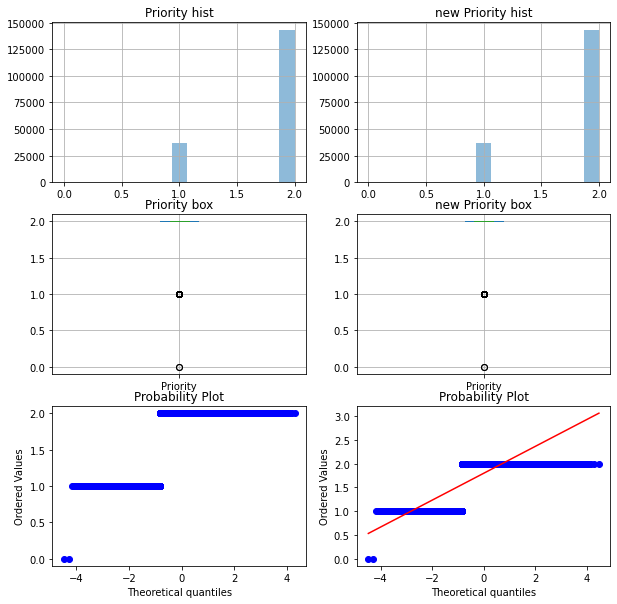

In [45]:
#Priority可视化对比新旧数据

plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("Priority hist")
data['Priority'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#直方图
plt.subplot(3,2,2)
plt.title("new Priority hist")
data_Priority.hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数


#盒图
plt.subplot(3,2,3)
plt.title("Priority box")
data['Priority'].plot(kind='box',notch=True,grid=True)

#盒图
plt.subplot(3,2,4)
plt.title("new Priority box")
data_Priority.plot(kind='box',notch=True,grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['Priority'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(data_Priority,dist="norm",plot=plt)

plt.show()

In [46]:
#Priority的数据描述
data_Priority.describe()

count    180016.000000
mean          1.796107
std           0.402919
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: Priority, dtype: float64